In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
_type = 'lqr'
df = pd.read_csv(f"../simulation/logs/{_type}/{_type}.csv", dtype=np.float64)
df.describe()

,timestamp_s,pitch_degrees_t1,control_latency_microseconds_t1,pitch_degrees_t2,control_latency_microseconds_t2,pitch_degrees_t3,control_latency_microseconds_t3
count,1002.000000,1002.000000,1001.000000,1002.000000,1001.000000,1002.000000,1001.000000
mean,5.005000,1.342482,7.350949,1.005600,7.621399,1.230493,7.376623
std,2.893968,3.372896,5.273623,2.295257,5.163781,2.618527,5.268615
min,0.000000,-8.359030,3.100000,-5.869360,3.810000,-4.615500,2.620000
25%,2.502500,-0.167305,5.010000,-0.129233,5.010000,0.155917,5.010000
50%,5.005000,0.880425,5.960000,0.764585,5.960000,1.016755,5.960000
75%,7.507500,2.083695,6.910000,1.755848,7.870000,1.913375,7.150000
max,10.010000,24.706200,77.720000,14.567390,55.070000,24.272410,49.110000


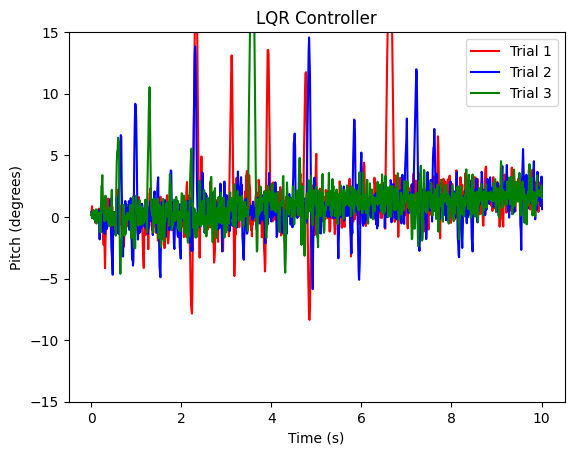

In [15]:
plt.plot(df["timestamp_s"], df["pitch_degrees_t1"], color="red", label="Trial 1")
plt.plot(df["timestamp_s"], df["pitch_degrees_t2"], color="blue", label="Trial 2")
plt.plot(df["timestamp_s"], df["pitch_degrees_t3"], color="green", label="Trial 3")
plt.xlabel("Time (s)")
plt.ylabel("Pitch (degrees)")
plt.title(f"{_type.upper()} Controller")
plt.ylim(-15, 15)
plt.legend()
plt.show()

In [16]:
t1_avg = df['control_latency_microseconds_t1'].mean()
t2_avg = df['control_latency_microseconds_t2'].mean()
t3_avg = df['control_latency_microseconds_t3'].mean()

avg = (t1_avg+t2_avg+t3_avg)/3

print(f'Average latency: {avg:.3f} microseconds')


Average latency: 7.450 microseconds


In [17]:
rmse_t1 = np.sqrt(np.mean(df["pitch_degrees_t1"]**2))
rmse_t2 = np.sqrt(np.mean(df["pitch_degrees_t2"]**2))
rmse_t3 = np.sqrt(np.mean(df["pitch_degrees_t3"]**2))

# Average the three RMSEs
avg_rmse = (rmse_t1 + rmse_t2 + rmse_t3) / 3

print(f"RMSE Trial 1: {rmse_t1:.3f}°")
print(f"RMSE Trial 2: {rmse_t2:.3f}°")
print(f"RMSE Trial 3: {rmse_t3:.3f}°")
print(f"Average RMSE: {avg_rmse:.3f}°")

RMSE Trial 1: 3.629°
RMSE Trial 2: 2.505°
RMSE Trial 3: 2.892°
Average RMSE: 3.009°
